In [1]:
# Basic python modules
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# OQ modules
from openquake.hazardlib.gsim import get_available_gsims
#from openquake.hazardlib.gsim.base import RuptureContext, SitesContext, DistancesContext # Desactualizado
from openquake.hazardlib.contexts import RuptureContext, SitesContext, DistancesContext
from openquake.hazardlib.imt import SA
from openquake.hazardlib import const

from openquake.hazardlib.valid import gsim

In [2]:
gmpe_list = get_available_gsims()

for gmpe in gmpe_list:
    print(gmpe)

AbrahamsonEtAl2014
AbrahamsonEtAl2014NSHMPLower
AbrahamsonEtAl2014NSHMPMean
AbrahamsonEtAl2014NSHMPUpper
AbrahamsonEtAl2014RegCHN
AbrahamsonEtAl2014RegJPN
AbrahamsonEtAl2014RegTWN
AbrahamsonEtAl2015SInter
AbrahamsonEtAl2015SInterHigh
AbrahamsonEtAl2015SInterLow
AbrahamsonEtAl2015SInter_scaled
AbrahamsonEtAl2015SSlab
AbrahamsonEtAl2015SSlabHigh
AbrahamsonEtAl2015SSlabLow
AbrahamsonEtAl2015SSlab_scaled
AbrahamsonEtAl2018SInter
AbrahamsonEtAl2018SInterHigh
AbrahamsonEtAl2018SInterLow
AbrahamsonEtAl2018SSlab
AbrahamsonEtAl2018SSlabHigh
AbrahamsonEtAl2018SSlabLow
AbrahamsonGulerce2020SInter
AbrahamsonGulerce2020SInterAlaska
AbrahamsonGulerce2020SInterCascadia
AbrahamsonGulerce2020SInterCentralAmericaMexico
AbrahamsonGulerce2020SInterJapan
AbrahamsonGulerce2020SInterNewZealand
AbrahamsonGulerce2020SInterSouthAmerica
AbrahamsonGulerce2020SInterTaiwan
AbrahamsonGulerce2020SSlab
AbrahamsonGulerce2020SSlabAlaska
AbrahamsonGulerce2020SSlabCascadia
AbrahamsonGulerce2020SSlabCentralAmericaMexico
Ab

In [3]:
print("Nro de ecuaciones:",len(gmpe_list))

Nro de ecuaciones: 894


- integer: 1,2,3,15 (int) -> nros enteros
- float: 1.2323, pi, -123.999 -> nros reales (decimales)
- complex: nros complejos

In [4]:
ecuacion1=gsim("[ChiouYoungs2014]")
print(ecuacion1.REQUIRES_RUPTURE_PARAMETERS) # Rupture
print(ecuacion1.REQUIRES_DISTANCES) # Distances
print(ecuacion1.REQUIRES_SITES_PARAMETERS) # Sites

frozenset({'dip', 'rake', 'mag', 'ztor'})
frozenset({'rx', 'rrup', 'rjb'})
frozenset({'vs30measured', 'z1pt0', 'vs30'})


In [5]:
gmpes=[
    gsim("[ChiouYoungs2014]"),
    gsim("[AbrahamsonEtAl2014]"),
    gsim("[CampbellBozorgnia2014]"),
    gsim("[BooreEtAl2014]"),
    gsim("[Idriss2014]"),
    ]

In [6]:
for gmpe in gmpes:
    print(str(gmpe))
    print("Rupture:",list(gmpe.REQUIRES_RUPTURE_PARAMETERS))
    print("Sites:",list(gmpe.REQUIRES_SITES_PARAMETERS))
    print("Distance:",list(gmpe.REQUIRES_DISTANCES))
    print("\n")

[ChiouYoungs2014]
Rupture: ['dip', 'rake', 'mag', 'ztor']
Sites: ['vs30measured', 'z1pt0', 'vs30']
Distance: ['rx', 'rrup', 'rjb']


[AbrahamsonEtAl2014]
Rupture: ['ztor', 'mag', 'dip', 'rake', 'width']
Sites: ['vs30measured', 'z1pt0', 'vs30']
Distance: ['ry0', 'rx', 'rrup', 'rjb']


[CampbellBozorgnia2014]
Rupture: ['hypo_depth', 'ztor', 'mag', 'dip', 'rake', 'width']
Sites: ['z2pt5', 'vs30']
Distance: ['rx', 'rrup', 'rjb']


[BooreEtAl2014]
Rupture: ['rake', 'mag']
Sites: ['vs30']
Distance: ['rjb']


[Idriss2014]
Rupture: ['rake', 'mag']
Sites: ['vs30']
Distance: ['rrup']




## Definición del escenario

In [7]:
# Rupture Context

rctx = RuptureContext()
rctx.ztor = np.array([10.0])
rctx.dip = np.array([45.0]) # 
rctx.mag = np.array([6.5])
rctx.rake = np.array([0.0]) # + inversa, - normal
rctx.width = np.array([20.0])
rctx.hypo_depth = np.array([15.0])

# Sites Context

sctx = SitesContext()

sctx.z1pt0 = np.array([50.0]) # m
sctx.z2pt5 = np.array([0.250]) # km
sctx.vs30 = np.array([760.0])
sctx.vs30measured = np.array(1)
sctx.sids = np.array([1])

# Distance Context

dctx = DistancesContext()

dctx.rrup = np.array([55.0])
dctx.rjb = np.array([10.0])
dctx.rx = np.array([60.0])
dctx.ry0 = np.array([0.0]) # Plan view of a fault rupture (Kaklamanos et al. 2011)

In [8]:
# periods=np.array([0.01,0.02,1.0,2.0,10.0])
periods = np.logspace(-2, 1, 100) # 0.01 a 10, 100 numeros

# intensity measure types
imts = [SA(period) for period in periods] # list comprehension

stddev_types = [const.StdDev.TOTAL]

In [9]:
print(periods)

[ 0.01        0.01072267  0.01149757  0.01232847  0.01321941  0.01417474
  0.01519911  0.01629751  0.01747528  0.01873817  0.02009233  0.02154435
  0.0231013   0.02477076  0.02656088  0.02848036  0.03053856  0.03274549
  0.03511192  0.03764936  0.04037017  0.04328761  0.04641589  0.04977024
  0.05336699  0.05722368  0.06135907  0.06579332  0.07054802  0.07564633
  0.08111308  0.0869749   0.09326033  0.1         0.10722672  0.1149757
  0.12328467  0.13219411  0.14174742  0.15199111  0.16297508  0.17475284
  0.18738174  0.2009233   0.21544347  0.23101297  0.24770764  0.26560878
  0.28480359  0.30538555  0.32745492  0.35111917  0.37649358  0.40370173
  0.43287613  0.46415888  0.49770236  0.53366992  0.57223677  0.61359073
  0.65793322  0.70548023  0.75646333  0.81113083  0.869749    0.93260335
  1.          1.07226722  1.149757    1.23284674  1.32194115  1.41747416
  1.51991108  1.62975083  1.7475284   1.87381742  2.009233    2.15443469
  2.3101297   2.47707636  2.65608778  2.84803587  3.

In [10]:
print(imts)

[SA(0.01), SA(0.010722672220103232), SA(0.011497569953977356), SA(0.012328467394420659), SA(0.013219411484660288), SA(0.014174741629268055), SA(0.01519911082952934), SA(0.016297508346206444), SA(0.01747528400007684), SA(0.01873817422860384), SA(0.02009233002565047), SA(0.021544346900318846), SA(0.023101297000831605), SA(0.024770763559917114), SA(0.026560877829466867), SA(0.02848035868435802), SA(0.030538555088334154), SA(0.03274549162877728), SA(0.03511191734215131), SA(0.037649358067924674), SA(0.040370172585965536), SA(0.04328761281083057), SA(0.046415888336127795), SA(0.049770235643321115), SA(0.0533669923120631), SA(0.05722367659350217), SA(0.06135907273413173), SA(0.06579332246575682), SA(0.07054802310718646), SA(0.07564633275546291), SA(0.08111308307896872), SA(0.08697490026177834), SA(0.093260334688322), SA(0.1), SA(0.10722672220103231), SA(0.11497569953977356), SA(0.12328467394420659), SA(0.13219411484660293), SA(0.14174741629268056), SA(0.1519911082952934), SA(0.16297508346206

In [11]:
print(stddev_types)

['Total']


In [12]:
def calculate_ground_motions(gmpes, imts, sctx, rctx, dctx, stddev_types):
    """
    Calculates the expected ground motion and uncertainty, organised by GMPE
    and intensity measure type (i.e. PGA, SA etc.), for a given rupture-site configuration    
    """
    results = {}
    nper = len(imts)
    for gmpe in gmpes:
        print("Running GMPE %s" % str(gmpe))
        results[str(gmpe)] = {"mean": np.zeros(nper),
                              "stddevs": np.zeros(nper),
                              "mean_plus_1sd": np.zeros(nper),
                              "mean_minus_1sd": np.zeros(nper)}
        for i, imt in enumerate(imts):
            try:
                mean, [stddev] = gmpe.get_mean_and_stddevs(
                    sctx, rctx, dctx, imt, stddev_types)
                results[str(gmpe)]["mean"][i] = np.exp(mean) # e^ln(Sa)
                results[str(gmpe)]["stddevs"][i] = stddev # sd
                results[str(gmpe)]["mean_plus_1sd"][i] = np.exp(mean + stddev) # e^(ln(Sa) + sd) - P84
                results[str(gmpe)]["mean_minus_1sd"][i] = np.exp(mean - stddev) # e^(ln(Sa) - sd) - P16
            except KeyError:
                results[str(gmpe)]["mean"][i] = np.nan
                results[str(gmpe)]["stddevs"][i] = np.nan
                results[str(gmpe)]["mean_plus_1sd"][i] = np.nan
                results[str(gmpe)]["mean_minus_1sd"][i] = np.nan
    return results


In [13]:
results = calculate_ground_motions(gmpes, imts, sctx, rctx, dctx, stddev_types)

Running GMPE [ChiouYoungs2014]
Running GMPE [AbrahamsonEtAl2014]
Running GMPE [CampbellBozorgnia2014]
Running GMPE [BooreEtAl2014]
Running GMPE [Idriss2014]


/var/folders/xt/h6m5q8xs5qs7f905tg1pwtz80000gn/T/ipykernel_81372/3058179106.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[str(gmpe)]["mean"][i] = np.exp(mean) # e^ln(Sa)
/var/folders/xt/h6m5q8xs5qs7f905tg1pwtz80000gn/T/ipykernel_81372/3058179106.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results[str(gmpe)]["stddevs"][i] = stddev # sd
/var/folders/xt/h6m5q8xs5qs7f905tg1pwtz80000gn/T/ipykernel_81372/3058179106.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Depre

In [14]:
for key in results.keys():
    print(str(key))
    print(results[key])

[ChiouYoungs2014]
{'mean': array([0.0790161 , 0.07915973, 0.07930351, 0.07944745, 0.07959155,
       0.0797358 , 0.07988021, 0.08002478, 0.08016951, 0.0803144 ,
       0.08055667, 0.08219178, 0.08385949, 0.08556044, 0.0872953 ,
       0.08906471, 0.09125957, 0.0946843 , 0.09823423, 0.10191365,
       0.10581358, 0.11044832, 0.11527537, 0.1203014 , 0.12563098,
       0.13119547, 0.1369974 , 0.14304598, 0.14935069, 0.15553557,
       0.15915158, 0.16288283, 0.1667357 , 0.17071717, 0.17272618,
       0.17481757, 0.1763234 , 0.17684423, 0.17744862, 0.17776763,
       0.17655853, 0.17473823, 0.17193387, 0.16904924, 0.16411022,
       0.15930703, 0.15463686, 0.14838179, 0.14210279, 0.13573309,
       0.1286976 , 0.12198324, 0.11557826, 0.10937563, 0.10286718,
       0.09668491, 0.09081421, 0.08429263, 0.07815049, 0.07242595,
       0.06708477, 0.06209274, 0.05736858, 0.05265573, 0.04830221,
       0.04427767, 0.04055412, 0.0370002 , 0.03373353, 0.03072977,
       0.02796681, 0.0254246 , 0.02

In [20]:
import pandas as pd

df_spectrums = pd.Series(periods, name="periods")

for gmpe in gmpes:
    # actual_spectrum = pd.Series(results[str(gmpe)]["mean_plus_1sd"], name=str(gmpe))
    actual_spectrum = pd.Series(results[str(gmpe)]["mean"], name=str(gmpe))
    df_spectrums = pd.concat([df_spectrums, actual_spectrum], axis=1)

df_spectrums.to_excel("espectros_corteza.xlsx")

# NaN: Not a Number

In [21]:
df_spectrums

,periods,[ChiouYoungs2014],[AbrahamsonEtAl2014],[CampbellBozorgnia2014],[BooreEtAl2014],[Idriss2014]
0,0.010000,0.079016,0.060443,0.064900,0.211631,0.032002
1,0.010723,0.079160,0.060561,0.065029,0.211845,0.032089
2,0.011498,0.079304,0.060680,0.065158,0.212058,0.032177
3,0.012328,0.079447,0.060798,0.065287,0.212272,0.032264
4,0.013219,0.079592,0.060917,0.065417,0.212486,0.032352
...,...,...,...,...,...,...
95,7.564633,0.000834,0.001656,0.001352,0.007976,0.002911
96,8.111308,0.000718,0.001496,0.001211,0.007141,0.002551
97,8.697490,0.000617,0.001350,0.001084,0.006344,0.002234
98,9.326033,0.000529,0.001219,0.000971,0.005577,0.001957


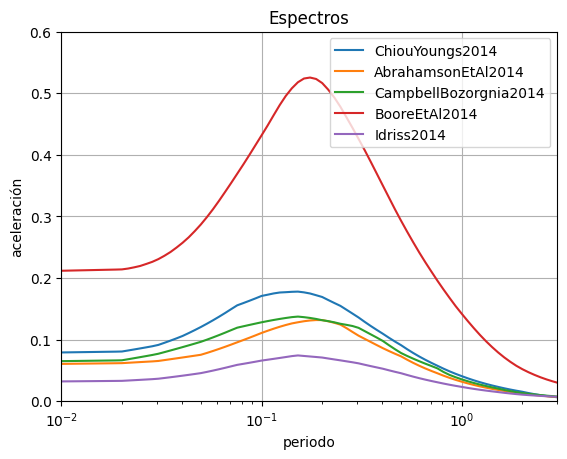

In [154]:
# plt.semilogx
plt.semilogx(periods,results["[ChiouYoungs2014]"]["mean"],label="ChiouYoungs2014")
plt.semilogx(periods,results["[AbrahamsonEtAl2014]"]["mean"],label="AbrahamsonEtAl2014")
plt.semilogx(periods,results["[CampbellBozorgnia2014]"]["mean"],label="CampbellBozorgnia2014")
plt.semilogx(periods,results["[BooreEtAl2014]"]["mean"],label="BooreEtAl2014")
plt.semilogx(periods,results["[Idriss2014]"]["mean"],label="Idriss2014")

plt.xlim([0.01,3.0])
plt.ylim([0.0,0.6])
plt.xlabel("periodo")
plt.ylabel("aceleración")
plt.title("Espectros")
plt.grid()
plt.legend()
plt.savefig("figura corteza.png", dpi=600)